In [1]:
# Import dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# Import Dataset
df = pd.read_csv("crypto_data.csv", index_col=0)
df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [3]:
#list algorithms in use
algorithms = set(df.Algorithm.values)
print(algorithms)

{'Lyra2RE', 'CryptoNight Heavy X', 'Multiple', 'HMQ1725', 'Green Protocol', 'Dagger-Hashimoto', 'T-Inside', 'Equihash+Scrypt', 'SkunkHash v2 Raptor', 'SkunkHash', 'Zhash', 'Slatechain', 'Wild Keccak', 'Shabal256', 'Jump Consistent Hash', 'ScryptOG', 'X16R', 'SHA3', 'vDPOS', 'Keccak', 'Time Travel', 'X11', 'Proof-of-BibleHash', 'IMesh', 'SHA-256 + Hive', 'NIST5', 'Quark', 'SHA-256D', 'CryptoNight Heavy', 'QuarkTX', 'M00N', 'X14', 'SHA3-256', 'Curve25519', 'PHI1612', 'CryptoNight-lite', 'QuBit', 'Blake2b', 'X16S', 'X11GOST', 'Lyra2REv2', 'BLAKE256', 'Argon2', 'Rainforest', 'Blake', 'SHA-256', 'QUAIT', 'SHA-512', 'XG Hash', 'C11', 'YescryptR16', 'Proof-of-Authority', 'Semux BFT consensus', 'XEVAN', 'Tribus', 'Blake2S', 'Leased POS', 'X15', 'Progressive-n', 'NeoScrypt', 'PoS', 'Skein', '536', 'VBFT', 'PHI2', 'Stanford Folding', 'POS 2.0', 'CryptoNight', 'CryptoNight-Lite', '1GB AES Pattern Search', 'Exosis', 'M7 POW', 'DPoS', 'Equihash1927', 'Avesta hash', 'Argon2d', 'ECC 256K1', 'POS 3.0'

In [4]:
# Show amt of active crypto coins
df["IsTrading"].value_counts()

True     1144
False     108
Name: IsTrading, dtype: int64

In [5]:
# Filter by ones that are being actively traded
df = df.loc[df["IsTrading"] == True]
df["IsTrading"].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [6]:
# Delete IsTrading column
df = df.drop("IsTrading", axis=1)
df.head(20)

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [7]:
# Drop null value rows
df = df.dropna(axis=0, how="any")
df.shape

(685, 5)

In [8]:
# Sort values to identify negative/zero data points
df["TotalCoinsMined"].sort_values()

FIII   -5.917978e+09
LBTC    0.000000e+00
RIPO    0.000000e+00
BASH    0.000000e+00
CSH     0.000000e+00
            ...     
QWC     9.955311e+10
NYC     1.430067e+11
GCN     1.630551e+11
BCN     1.840668e+11
BTT     9.899887e+11
Name: TotalCoinsMined, Length: 685, dtype: float64

In [9]:
# Clean negative / zero data points
df = df.loc[df["TotalCoinsMined"] > 0]
df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [10]:
# View new length of cleaned dataset
len(df)

532

In [11]:
df = df.drop("CoinName", axis=1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [12]:
# Create features list and target for Unsupervised ML Model
X = pd.get_dummies(data=df, columns=["Algorithm", "ProofType"])
print(X.shape)
X.head()

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Scaling the features list dataset
# Standard Scaler gives values between -2 and 2
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled[0]

array([-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
       -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
       -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
       -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
       -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
       -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
       -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
       -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
       -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
       -0.0433963 , -0.39879994, -0.0433963 , -0.18168574, -0.04

In [15]:
# Identify the numbers of rowas and columns in the scaled data
X_scaled.shape

(532, 98)

In [16]:
# Reduce dimension with PCA with 99% of data
pca = PCA(n_components=.99)
principal_compnenets = pca.fit_transform(X_scaled)
principal_compnenets.shape

(532, 86)

In [17]:
pca.explained_variance_.sum()

97.35133315075761

In [18]:
# Reduce dimension with PCA 
pca = PCA(n_components=.90)
principal_compnenets = pca.fit_transform(X_scaled)
principal_compnenets.shape

(532, 74)

In [19]:
# Variance levels display of the princiapl_components line above
print(pca.explained_variance_.sum())

88.47283457566152


In [20]:
# Reduce dimensions with t-SNE
tsne = TSNE(perplexity=50)
tsne_feature = tsne.fit_transform(principal_compnenets)
tsne_feature.shape

C:\Users\april\newdwnlds\envs\pythondata\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\april\newdwnlds\envs\pythondata\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(532, 2)

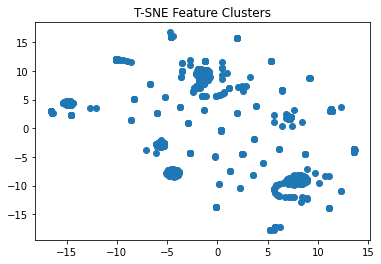

In [24]:
# Plot T-SNE features
X = tsne_feature[:,0]
y = tsne_feature[:,1]
# Display plt
plt.scatter(X,y)
plt.title("T-SNE Feature Clusters")
plt.show()

In [22]:
# Identify cluster with k-means
inertia = []
k = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for value in k:
    kmeans = KMeans(n_clusters= value, random_state=0)
    kmeans.fit(principal_compnenets)
    inertia.append(kmeans.inertia_)

C:\Users\april\newdwnlds\envs\pythondata\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


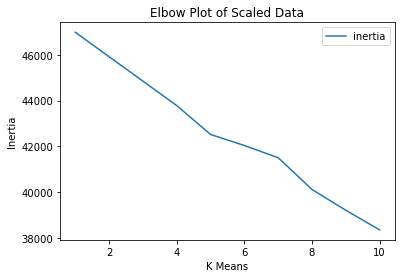

In [23]:
# Elbow plot
elbow_df = pd.DataFrame({"k": k, "inertia": inertia})
elbow_df.plot.line(x="k", y="inertia")
plt.xlabel("K Means")
plt.ylabel("Inertia")
plt.title("Elbow Plot of Scaled Data")

plt.show()


CONCLUSION: As we can see, there is no place where the elbow even remotely begins to smooth out for this respective dataset. We can safely say that there is no where that any good clustering is showing or likely. Basically, TSNE and the elbow plot conclude that we just have the one cluster or we have no where in which any meaningful clustering is happening  within this respective dataset.